In [278]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math
from termcolor import colored as cl 
import numpy as np
#%matplotlib notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9, 6)



In [279]:
from sagemaker import get_execution_role
role = get_execution_role()

In [280]:
Tape_with_LOB = pd.read_csv(f"s3://project-b-data/proj-b/Tape_with_LOB/Tape_with_LOB1.csv")

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [281]:
Tape_with_LOB

,Date,Time,Price,Quantity,Party1,Party2,Bid,Ask
0,2022-01-04,8.192,203,2.0,S26,B24,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,..."
1,2022-01-04,8.192,199,3.0,S26,B08,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,..."
2,2022-01-04,10.336,196,3.0,S06,B07,"[[196, 3], [195, 4], [187, 8], [182, 1], [156,...","[[197, 4], [198, 3], [201, 1], [202, 4], [209,..."
3,2022-01-04,10.672,196,4.0,S01,B01,"[[195, 4], [187, 5], [183, 3], [182, 1], [156,...","[[196, 4], [201, 1], [203, 4], [209, 9], [214,..."
4,2022-01-04,11.040,201,1.0,S12,B31,"[[192, 4], [187, 5], [182, 1], [176, 5], [168,...","[[201, 1], [203, 4], [205, 5], [209, 4], [214,..."
...,...,...,...,...,...,...,...,...
5230359,2022-04-29,30599.376,134,1.0,S21,B07,"[[134, 8], [133, 9], [132, 3], [121, 5], [93, ...","[[158, 1], [206, 2], [329, 3], [418, 5], [479,..."
5230360,2022-04-29,30599.520,134,1.0,S03,B07,"[[134, 5], [133, 9], [132, 3], [121, 5], [93, ...","[[158, 1], [329, 3], [418, 5], [479, 4], [502,..."
5230361,2022-04-29,30599.584,134,1.0,S28,B01,"[[134, 4], [133, 9], [132, 3], [121, 5], [93, ...","[[158, 1], [329, 3], [418, 5], [479, 4], [502,..."
5230362,2022-04-29,30599.776,134,3.0,S04,B01,"[[134, 3], [133, 9], [132, 3], [121, 5], [93, ...","[[158, 1], [329, 3], [418, 5], [479, 4], [502,..."


In [282]:
Date = Tape_with_LOB["Date"].unique()

In [283]:
T104 = Tape_with_LOB.loc[Tape_with_LOB["Date"] == "2022-01-04"]

In [284]:
T104

,Date,Time,Price,Quantity,Party1,Party2,Bid,Ask
0,2022-01-04,8.192,203,2.0,S26,B24,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,..."
1,2022-01-04,8.192,199,3.0,S26,B08,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,..."
2,2022-01-04,10.336,196,3.0,S06,B07,"[[196, 3], [195, 4], [187, 8], [182, 1], [156,...","[[197, 4], [198, 3], [201, 1], [202, 4], [209,..."
3,2022-01-04,10.672,196,4.0,S01,B01,"[[195, 4], [187, 5], [183, 3], [182, 1], [156,...","[[196, 4], [201, 1], [203, 4], [209, 9], [214,..."
4,2022-01-04,11.040,201,1.0,S12,B31,"[[192, 4], [187, 5], [182, 1], [176, 5], [168,...","[[201, 1], [203, 4], [205, 5], [209, 4], [214,..."
...,...,...,...,...,...,...,...,...
64457,2022-01-04,30597.264,206,2.0,S22,B19,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,...","[[206, 2], [235, 2], [236, 1], [237, 2], [263,..."
64458,2022-01-04,30598.112,229,1.0,S15,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,..."
64459,2022-01-04,30598.112,230,2.0,S29,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,..."
64460,2022-01-04,30598.864,220,4.0,S19,B07,"[[220, 4], [219, 5], [217, 5], [211, 1], [196,...","[[236, 2], [263, 3], [325, 1], [420, 5], [436,..."


In [285]:
import ast
mid = []
def create_mid(sample):
   
    sample_bid = ast.literal_eval(sample["Bid"])
    sample_ask = ast.literal_eval(sample["Ask"])
    #print(sample_bid[0][0],sample_bid[0][1],sample_ask[0][0],sample_ask[0][1])
    mid.append((sample_bid[0][0]* sample_bid[0][1]+sample_ask[0][0]*sample_ask[0][1])/(sample_bid[0][1] +sample_ask[0][1] ))
    

In [286]:
T104.apply(lambda x: create_mid(x),axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
64457    None
64458    None
64459    None
64460    None
64461    None
Length: 64462, dtype: object

In [287]:
mid

[205.66666666666666,
 205.66666666666666,
 196.57142857142858,
 195.5,
 193.8,
 193.8,
 199.0,
 199.0,
 194.0,
 194.2,
 193.25,
 194.71428571428572,
 195.5,
 189.11111111111111,
 190.6,
 190.6,
 197.2,
 200.33333333333334,
 198.375,
 198.0,
 198.0,
 192.0,
 193.4,
 193.4,
 192.75,
 192.75,
 194.75,
 194.66666666666666,
 197.6,
 197.66666666666666,
 197.625,
 197.4,
 197.4,
 197.4,
 200.0,
 199.42857142857142,
 199.42857142857142,
 194.2,
 195.25,
 196.0,
 196.0,
 192.6,
 190.33333333333334,
 190.5,
 190.5,
 189.5,
 189.75,
 188.5,
 187.75,
 187.5,
 184.33333333333334,
 184.33333333333334,
 184.33333333333334,
 189.0,
 189.0,
 189.0,
 189.0,
 189.0,
 191.66666666666666,
 191.5,
 193.83333333333334,
 189.5,
 188.66666666666666,
 188.66666666666666,
 194.5,
 194.0,
 194.0,
 194.0,
 196.4,
 196.66666666666666,
 198.33333333333334,
 198.66666666666666,
 198.66666666666666,
 199.5,
 313.6666666666667,
 313.6666666666667,
 385.3333333333333,
 214.0,
 214.0,
 211.0,
 221.0,
 221.0,
 219.5,
 21

In [288]:
T104["Mid"] = mid

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [289]:
T104

,Date,Time,Price,Quantity,Party1,Party2,Bid,Ask,Mid
0,2022-01-04,8.192,203,2.0,S26,B24,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,...",205.666667
1,2022-01-04,8.192,199,3.0,S26,B08,"[[203, 2], [199, 3], [195, 4], [187, 5], [181,...","[[207, 4], [211, 4], [214, 2], [220, 5], [226,...",205.666667
2,2022-01-04,10.336,196,3.0,S06,B07,"[[196, 3], [195, 4], [187, 8], [182, 1], [156,...","[[197, 4], [198, 3], [201, 1], [202, 4], [209,...",196.571429
3,2022-01-04,10.672,196,4.0,S01,B01,"[[195, 4], [187, 5], [183, 3], [182, 1], [156,...","[[196, 4], [201, 1], [203, 4], [209, 9], [214,...",195.500000
4,2022-01-04,11.040,201,1.0,S12,B31,"[[192, 4], [187, 5], [182, 1], [176, 5], [168,...","[[201, 1], [203, 4], [205, 5], [209, 4], [214,...",193.800000
...,...,...,...,...,...,...,...,...,...
64457,2022-01-04,30597.264,206,2.0,S22,B19,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,...","[[206, 2], [235, 2], [236, 1], [237, 2], [263,...",204.571429
64458,2022-01-04,30598.112,229,1.0,S15,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,...",219.000000
64459,2022-01-04,30598.112,230,2.0,S29,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,...",219.000000
64460,2022-01-04,30598.864,220,4.0,S19,B07,"[[220, 4], [219, 5], [217, 5], [211, 1], [196,...","[[236, 2], [263, 3], [325, 1], [420, 5], [436,...",225.333333


In [290]:
df = pd.DataFrame(T104["Mid"])

In [291]:
df

,Mid
0,205.666667
1,205.666667
2,196.571429
3,195.500000
4,193.800000
...,...
64457,204.571429
64458,219.000000
64459,219.000000
64460,225.333333


In [292]:
def sma(data, n):
    sma = data.rolling(window = n).mean()
    return pd.DataFrame(sma)

df['sma_20'] = sma(df['Mid'], 20)
    
df.tail()

,Mid,sma_20
64457,204.571429,236.162991
64458,219.000000,235.225491
64459,219.000000,233.392157
64460,225.333333,232.586602
64461,225.333333,231.466905


In [293]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Mid'], df['sma_20'], 20)
df.tail()

,Mid,sma_20,upper_bb,lower_bb
64457,204.571429,236.162991,259.841271,212.484711
64458,219.000000,235.225491,260.094034,210.356948
64459,219.000000,233.392157,257.303457,209.480858
64460,225.333333,232.586602,256.441164,208.732040
64461,225.333333,231.466905,254.414149,208.519660


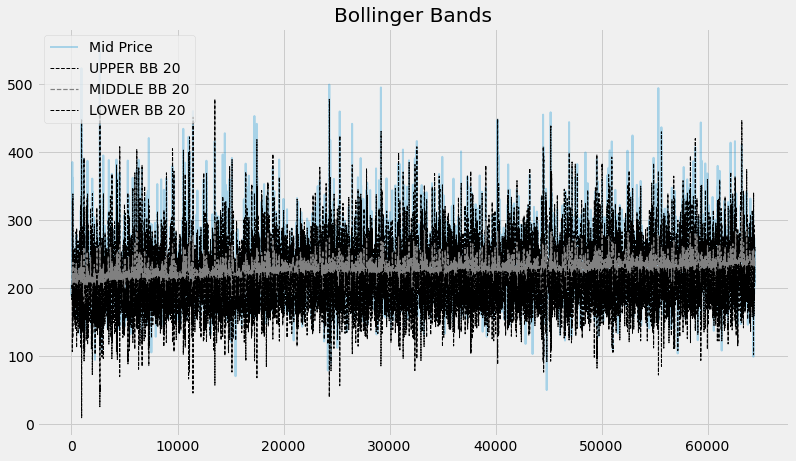

In [294]:
fig, ax = plt.subplots(figsize=(12,7))
df['Mid'].plot(label = 'Mid Price', linewidth = 2, alpha = 0.3,ax=ax)
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black',ax=ax)
df['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey',ax=ax)
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black',ax=ax)
ax.set_title('Bollinger Bands')
ax.legend(loc = 'upper left')

In [295]:
def bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(1,len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = bb_strategy(df['Mid'], df['lower_bb'], df['upper_bb'])

In [296]:
len(buy_price)

64461

In [297]:
buy_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 190.33333333333334,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 201.6,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

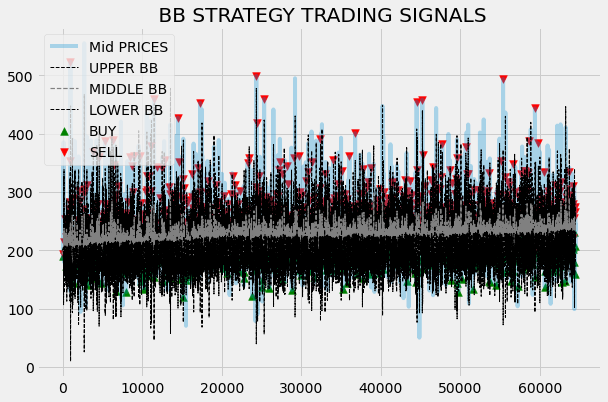

In [298]:
df['Mid'].plot(label = 'Mid PRICES', alpha = 0.3)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index[1:], buy_price, marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(df.index[1:], sell_price, marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title(' BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [299]:
len(df)

64462

In [300]:
len(bb_signal)

64461

In [301]:
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        


In [302]:
for i in range(1,len(df['Mid'])):
    if bb_signal[i-1] == 1:
        position[i-1] = 1
    elif bb_signal[i-1] == -1:
        position[i-1] = 0
    else:
        position[i-1] = position[i-2]
        


In [303]:
upper_bb = df['upper_bb'][1:]
lower_bb = df['lower_bb'][1:]
mid_price = df['Mid'][1:]




In [304]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            64452, 64453, 64454, 64455, 64456, 64457, 64458, 64459, 64460,
            64461],
           dtype='int64', length=64462)

In [305]:

bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index[1:])
position1 = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index[1:])



In [306]:
frames = [mid_price, upper_bb, lower_bb, bb_signal, position1]
strategy = pd.concat(frames, join = 'inner', axis = 1)
#strategy = strategy.reset_index().drop('date', axis = 1)

strategy

,Mid,upper_bb,lower_bb,bb_signal,bb_position
1,205.666667,NaN,NaN,0,1
2,196.571429,NaN,NaN,0,1
3,195.500000,NaN,NaN,0,1
4,193.800000,NaN,NaN,0,1
5,193.800000,NaN,NaN,0,1
...,...,...,...,...,...
64457,204.571429,259.841271,212.484711,0,1
64458,219.000000,260.094034,210.356948,0,1
64459,219.000000,257.303457,209.480858,0,1
64460,225.333333,256.441164,208.732040,0,1


In [307]:
df_ret = pd.DataFrame(np.diff(df['Mid'])).rename(columns = {0:'returns'})
bb_strategy_ret = []


    




In [308]:
df_ret

,returns
0,0.000000
1,-9.095238
2,-1.071429
3,-1.700000
4,0.000000
...,...
64456,-29.028571
64457,14.428571
64458,0.000000
64459,6.333333


In [309]:
for i in range(len(df_ret)):
    try:
        returns = df_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass

In [310]:
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df["Mid"][1])
bb_investment_ret = []



In [311]:
number_of_stocks

486

In [312]:
#sum(bb_investment_ret_df["investment_returns"])

In [313]:
for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

    
    
bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})




total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit: {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit rate:{}%'.format(profit_percentage), attrs = ['bold']))



Profit: 28826790.95
Profit rate:28826%


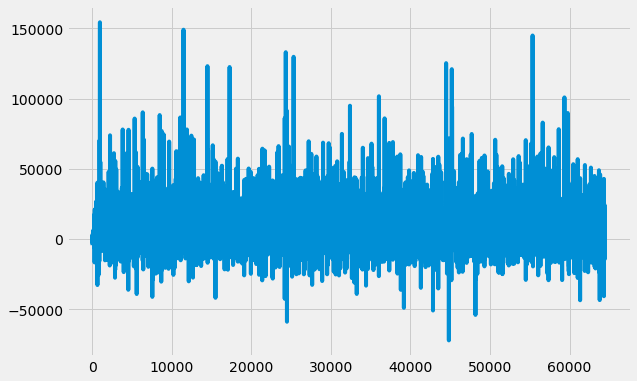

In [314]:
plt.plot(bb_investment_ret_df)

In [315]:
bb_strategy_ret_df

,bb_returns
0,-9.095238
1,-1.071429
2,-1.700000
3,0.000000
4,5.200000
...,...
64455,-29.028571
64456,14.428571
64457,0.000000
64458,6.333333


In [323]:
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'}).iloc[51568:].set_index(y_pred_df.index[0:])

investment_value = 100000
number_of_stocks = math.floor(investment_value/df["Mid"][51570])
bb_investment_ret = []





In [324]:
bb_strategy_ret_df

,bb_returns
0,9.000000
1,0.000000
2,-51.500000
3,-7.500000
4,0.000000
...,...
12887,-29.028571
12888,14.428571
12889,0.000000
12890,6.333333


In [325]:
for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

    
    
bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})




total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit: {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit rate:{}%'.format(profit_percentage), attrs = ['bold']))

Profit: 5330885.93
Profit rate:5330%


## LSTM

In [247]:
T104_mid = T104["Mid"]
X = T104["Time"]
Bid_ = T104["Bid"]
Ask_ = T104["Ask"]

In [241]:
Bid_

0        [[203, 2], [199, 3], [195, 4], [187, 5], [181,...
1        [[203, 2], [199, 3], [195, 4], [187, 5], [181,...
2        [[196, 3], [195, 4], [187, 8], [182, 1], [156,...
3        [[195, 4], [187, 5], [183, 3], [182, 1], [156,...
4        [[192, 4], [187, 5], [182, 1], [176, 5], [168,...
                               ...                        
64457    [[204, 5], [196, 2], [171, 5], [136, 4], [106,...
64458    [[217, 5], [206, 5], [196, 2], [187, 1], [179,...
64459    [[217, 5], [206, 5], [196, 2], [187, 1], [179,...
64460    [[220, 4], [219, 5], [217, 5], [211, 1], [196,...
64461    [[220, 4], [219, 5], [217, 5], [211, 1], [196,...
Name: Bid, Length: 64462, dtype: object

In [60]:
df = pd.DataFrame(dict(Mid=T104_mid.values), index=X, columns=['Mid'])
print(df)

                  Mid
Time                 
8.192      205.666667
8.192      205.666667
10.336     196.571429
10.672     195.500000
11.040     193.800000
...               ...
30597.264  204.571429
30598.112  219.000000
30598.112  219.000000
30598.864  225.333333
30598.864  225.333333

[64462 rows x 1 columns]


In [61]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

51569 12893


In [243]:
T104.iloc[51570:]

,Date,Time,Price,Quantity,Party1,Party2,Bid,Ask,Mid
51570,2022-01-04,24480.752,222,1.0,S09,B28,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ...","[[253, 1], [254, 1], [256, 5], [528, 4], [611,...",237.500000
51571,2022-01-04,24480.752,208,3.0,S09,B22,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ...","[[253, 1], [254, 1], [256, 5], [528, 4], [611,...",237.500000
51572,2022-01-04,24484.496,201,1.0,S24,B18,"[[156, 1], [148, 5], [130, 1], [126, 4], [110,...","[[201, 2], [202, 22], [203, 1], [251, 5], [585...",186.000000
51573,2022-01-04,24484.528,201,1.0,S09,B31,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]","[[201, 1], [202, 22], [203, 1], [251, 5], [585...",178.500000
51574,2022-01-04,24484.528,202,1.0,S06,B31,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]","[[201, 1], [202, 22], [203, 1], [251, 5], [585...",178.500000
...,...,...,...,...,...,...,...,...,...
64457,2022-01-04,30597.264,206,2.0,S22,B19,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,...","[[206, 2], [235, 2], [236, 1], [237, 2], [263,...",204.571429
64458,2022-01-04,30598.112,229,1.0,S15,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,...",219.000000
64459,2022-01-04,30598.112,230,2.0,S29,B09,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,...",219.000000
64460,2022-01-04,30598.864,220,4.0,S19,B07,"[[220, 4], [219, 5], [217, 5], [211, 1], [196,...","[[236, 2], [263, 3], [325, 1], [420, 5], [436,...",225.333333


In [238]:
test

,Mid
Time,
24479.808,228.500000
24480.752,237.500000
24480.752,237.500000
24484.496,186.000000
24484.528,178.500000
...,...
30597.264,204.571429
30598.112,219.000000
30598.112,219.000000


In [154]:
train_size

51569

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline




In [63]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [64]:
X_train, y_train = create_dataset(train, train.Mid, 1)
X_test, y_test = create_dataset(test, test.Mid, 1)
print(X_train.shape, y_train.shape)

(51568, 1, 1) (51568,)


In [79]:
test

,Mid
Time,
24479.808,228.500000
24480.752,237.500000
24480.752,237.500000
24484.496,186.000000
24484.528,178.500000
...,...
30597.264,204.571429
30598.112,219.000000
30598.112,219.000000


In [221]:
y_test

array([237.5       , 237.5       , 186.        , ..., 219.        ,
       225.33333333, 225.33333333])

In [100]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001))

In [101]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/15
2901/2901 [==============================] - 6s 2ms/step - loss: 16747.5039 - val_loss: 3032.4949
Epoch 2/15
2901/2901 [==============================] - 6s 2ms/step - loss: 1055.2554 - val_loss: 804.4387
Epoch 3/15
2901/2901 [==============================] - 6s 2ms/step - loss: 773.6395 - val_loss: 624.0229
Epoch 4/15
2901/2901 [==============================] - 6s 2ms/step - loss: 672.2706 - val_loss: 545.2654
Epoch 5/15
2901/2901 [==============================] - 6s 2ms/step - loss: 603.8246 - val_loss: 441.2126
Epoch 6/15
2901/2901 [==============================] - 6s 2ms/step - loss: 554.7316 - val_loss: 430.8723
Epoch 7/15
2901/2901 [==============================] - 6s 2ms/step - loss: 529.4993 - val_loss: 391.9332
Epoch 8/15
2901/2901 [==============================] - 6s 2ms/step - loss: 507.7217 - val_loss: 344.0923
Epoch 9/15
2901/2901 [==============================] - 6s 2ms/step - loss: 488.5418 - val_loss: 334.6124
Epoch 10/15
2901/2901 [===================

In [102]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'LSTM One Day Predict')

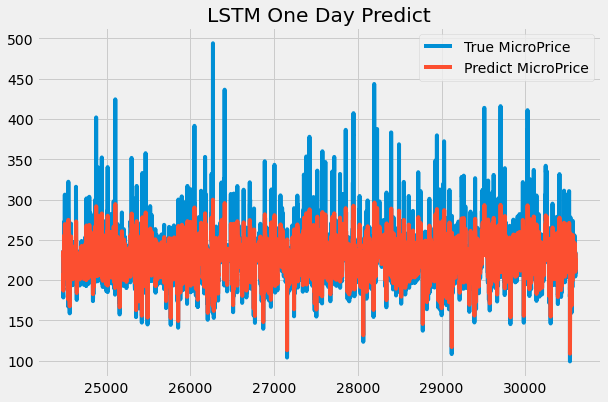

In [237]:
fig, ax = plt.subplots()
handle1 = ax.plot(test.index.to_numpy()[:-1],y_test,label = "True MicroPrice")
handle2 = ax.plot(test.index.to_numpy()[:-1],y_pred, label = "Predict MicroPrice")
ax.legend(["True MicroPrice", "Predict MicroPrice"])
ax.set_title("LSTM One Day Predict")



In [105]:
len(y_pred)

12892

In [106]:
y_pred_df = pd.DataFrame(y_pred,columns = ["Mid"])

In [107]:
##################################   LSTM ：1::
y_pred_df

,Mid
0,229.047256
1,235.238968
2,235.238968
3,194.081619
4,187.021545
...,...
12887,232.608734
12888,210.488037
12889,222.042465
12890,222.042465


In [108]:
y_pred_df['sma_20'] = sma(y_pred_df['Mid'], 20)
    
y_pred_df.tail()

,Mid,sma_20
12887,232.608734,235.240044
12888,210.488037,233.994205
12889,222.042465,233.326087
12890,222.042465,232.105719
12891,226.765976,231.553135


## Predicted Trading Strategy

In [109]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

y_pred_df['upper_bb'], y_pred_df['lower_bb'] = bb(y_pred_df['Mid'], y_pred_df['sma_20'], 20)
y_pred_df.tail()

,Mid,sma_20,upper_bb,lower_bb
12887,232.608734,235.240044,248.040407,222.439680
12888,210.488037,233.994205,250.914305,217.074104
12889,222.042465,233.326087,251.047933,215.604241
12890,222.042465,232.105719,249.378178,214.833260
12891,226.765976,231.553135,248.763196,214.343074


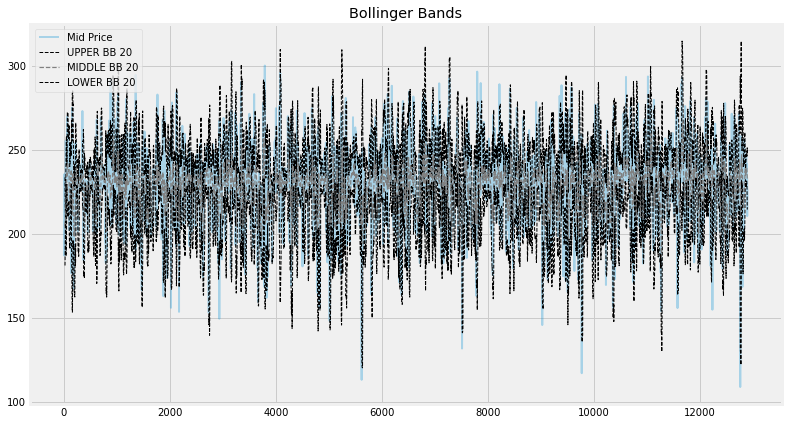

In [110]:
fig, ax = plt.subplots(figsize=(12,7))
y_pred_df['Mid'].plot(label = 'Mid Price', linewidth = 2, alpha = 0.3,ax=ax)
y_pred_df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black',ax=ax)
y_pred_df['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey',ax=ax)
y_pred_df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black',ax=ax)
ax.set_title('Bollinger Bands')
ax.legend(loc = 'upper left')

In [151]:
def bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(1,len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price_trade, sell_price_trade, bb_signal_trade = bb_strategy(y_pred_df['Mid'], y_pred_df['lower_bb'], y_pred_df['upper_bb'])

In [152]:
len(buy_price)

64461

In [157]:
#remember 51570
len(buy_price[51570:])

12891

In [163]:
true_price_sig = [i for i in buy_price[51570:] if pd.isna(i) == False]

In [153]:
len(buy_price_trade)

12891

In [164]:
pred_price_sig = [i for i in buy_price_trade if pd.isna(i) == False]

In [ ]:
predict_buy_price_MSE = 

(array([  200.,     0.,     0.,     0.,     0., 12491.,     0.,     0.,
            0.,   200.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

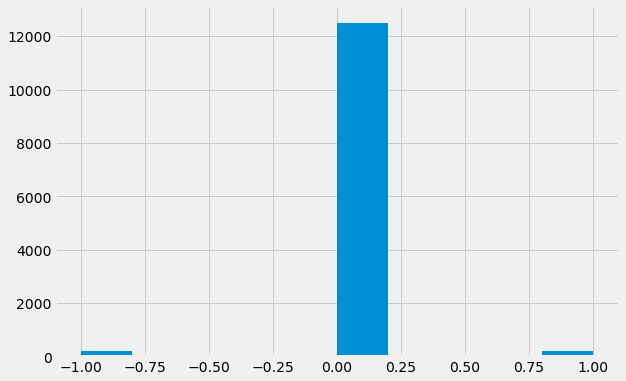

In [177]:
plt.hist(bb_signal["bb_signal"].iloc[51570:])

(array([  202.,     0.,     0.,     0.,     0., 12487.,     0.,     0.,
            0.,   202.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

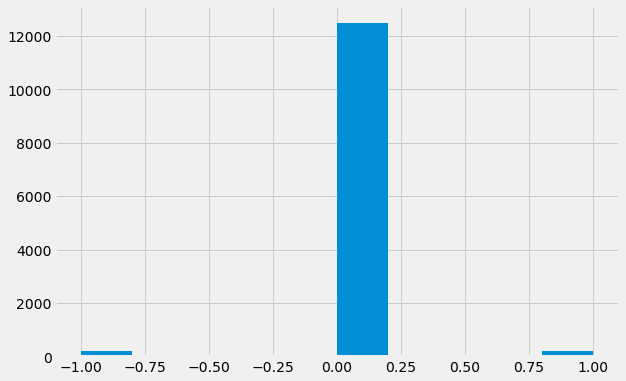

In [179]:
plt.hist(bb_signal_trade)

In [166]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(bb_signal[51569:-1],bb_signal_trade))

              precision    recall  f1-score   support

          -1       0.92      0.93      0.93       200
           0       1.00      1.00      1.00     12491
           1       0.89      0.90      0.90       200

    accuracy                           0.99     12891
   macro avg       0.94      0.94      0.94     12891
weighted avg       0.99      0.99      0.99     12891



In [204]:
?classification_report

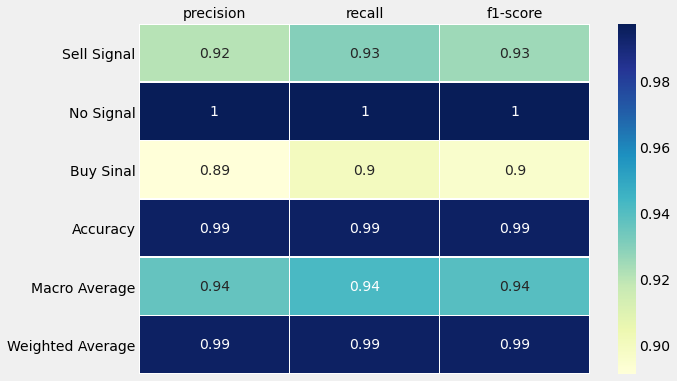

In [208]:
report = classification_report(bb_signal[51569:-1],bb_signal_trade,output_dict = True)
ax = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True,cmap="YlGnBu",linewidth=0.5,
                yticklabels= ["Sell Signal",
                             "No Signal",
                             "Buy Sinal",
                             "Accuracy",
                             "Macro Average",
             "Weighted Average"])


ax.xaxis.set_ticks_position('top')
plt.show()

In [190]:
?plt.scatter

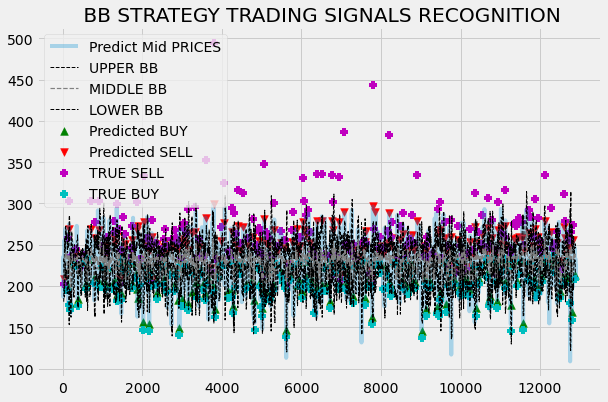

In [197]:
y_pred_df['Mid'].plot(label = 'Predict Mid PRICES', alpha = 0.3)
y_pred_df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
y_pred_df['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
y_pred_df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')


plt.scatter(y_pred_df.index[1:], buy_price_trade, marker = '^', color = 'green', label = 'Predicted BUY', s = 60)
plt.scatter(y_pred_df.index[1:], sell_price_trade, marker = 'v', color = 'red', label = 'Predicted SELL', s = 60)

plt.scatter(y_pred_df.index[1:], sell_price[51569:-1], marker = '+', color = 'm', label = 'TRUE SELL', s = 60)
plt.scatter(y_pred_df.index[1:], buy_price[51569:-1], marker = '+', color = 'c', label = 'TRUE BUY', s = 60)


plt.title(' BB STRATEGY TRADING SIGNALS RECOGNITION')
plt.legend(loc = 'upper left')
plt.show()

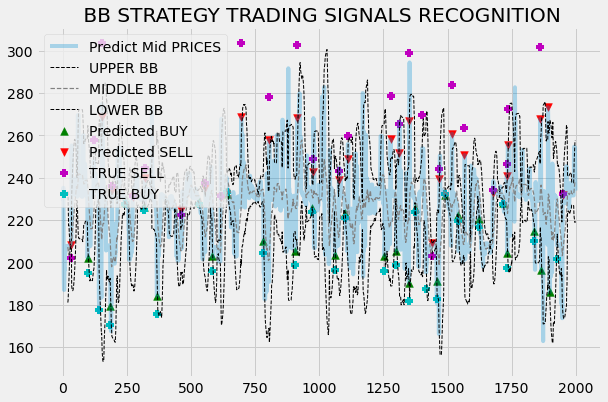

In [227]:
y_pred_df['Mid'][0:2000].plot(label = 'Predict Mid PRICES', alpha = 0.3)
y_pred_df['upper_bb'][0:2000].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
y_pred_df['sma_20'][0:2000].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
y_pred_df['lower_bb'][0:2000].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')


plt.scatter(y_pred_df.index[1:2001], buy_price_trade[0:2000], marker = '^', color = 'green', label = 'Predicted BUY', s = 60)
plt.scatter(y_pred_df.index[1:2001], sell_price_trade[0:2000], marker = 'v', color = 'red', label = 'Predicted SELL', s = 60)

plt.scatter(y_pred_df.index[1:2001], sell_price[51569:51569+2000], marker = '+', color = 'm', label = 'TRUE SELL', s = 60)
plt.scatter(y_pred_df.index[1:2001], buy_price[51569:51569+2000], marker = '+', color = 'c', label = 'TRUE BUY', s = 60)


plt.title(' BB STRATEGY TRADING SIGNALS RECOGNITION')
plt.legend(loc = 'upper left')
plt.show()

In [198]:
position_trade = []
for i in range(len(bb_signal_trade)):
    if bb_signal_trade[i] > 1:
        position_trade.append(0)
    else:
        position_trade.append(1)
        

In [199]:
for i in range(1,len(y_pred_df['Mid'])):
    if bb_signal_trade[i-1] == 1:
        position_trade[i-1] = 1
    elif bb_signal_trade[i-1] == -1:
        position_trade[i-1] = 0
    else:
        position_trade[i-1] = position_trade[i-2]

In [200]:
upper_bb_trade = y_pred_df['upper_bb'][1:]
lower_bb_trade = y_pred_df['lower_bb'][1:]
mid_price_trade = y_pred_df['Mid'][1:]




In [209]:
bb_signal_trade = pd.DataFrame(bb_signal_trade).rename(columns = {0:'bb_signal'}).set_index(y_pred_df.index[1:])
position1_trade = pd.DataFrame(position_trade).rename(columns = {0:'bb_position'}).set_index(y_pred_df.index[1:])



In [212]:
len(mid_price_trade)

12891

In [215]:
y_test[0:5]

array([237.5, 237.5, 186. , 178.5, 178.5])

In [222]:
#pd.DataFrame(y_test[:-1]).rename(columns = {0:'Mid'}).set_index(y_pred_df.index[1:])
####################3 Using the True MID
frames_trade = [pd.DataFrame(y_test[:-1]).rename(columns = {0:'Mid'}).set_index(y_pred_df.index[1:]),
                upper_bb_trade, lower_bb_trade, bb_signal_trade, position1_trade]
strategy_trade = pd.concat(frames_trade, join = 'inner', axis = 1)
#strategy = strategy.reset_index().drop('date', axis = 1)

strategy_trade

,Mid,upper_bb,lower_bb,bb_signal,bb_position
1,237.500000,NaN,NaN,0,1
2,237.500000,NaN,NaN,0,1
3,186.000000,NaN,NaN,0,1
4,178.500000,NaN,NaN,0,1
5,178.500000,NaN,NaN,0,1
...,...,...,...,...,...
12887,233.600000,248.040407,222.439680,0,1
12888,204.571429,250.914305,217.074104,0,1
12889,219.000000,251.047933,215.604241,0,1
12890,219.000000,249.378178,214.833260,0,1


In [223]:
df_ret_trade = pd.DataFrame(np.diff(y_pred_df['Mid'])).rename(columns = {0:'returns'})
bb_strategy_ret_trade = []


In [224]:
for i in range(len(df_ret_trade)):
    try:
        returns = df_ret_trade['returns'][i]*strategy_trade['bb_position'][i]
        bb_strategy_ret_trade.append(returns)
    except:
        pass

In [229]:
bb_strategy_ret_df_trade = pd.DataFrame(bb_strategy_ret_trade).rename(columns = {0:'bb_returns'})

investment_value_trade = 100000
number_of_stocks = math.floor(investment_value_trade/y_pred_df["Mid"][1])
bb_investment_ret_trade = []


In [230]:
number_of_stocks

425

In [231]:
for i in range(len(bb_strategy_ret_df_trade['bb_returns'])):
    returns_trade = number_of_stocks*bb_strategy_ret_df_trade['bb_returns'][i]
    bb_investment_ret_trade.append(returns_trade)

    
    
bb_investment_ret_df_trade = pd.DataFrame(bb_investment_ret_trade).rename(columns = {0:'investment_returns'})




total_investment_ret_trade = round(sum(bb_investment_ret_df_trade['investment_returns']), 2)
profit_percentage_trade = math.floor((total_investment_ret_trade/investment_value_trade)*100)
print(cl('Profit: {}'.format(total_investment_ret_trade), attrs = ['bold']))
print(cl('Profit Rate: {}%'.format(profit_percentage_trade), attrs = ['bold']))

Profit: 3506373.27
Profit Rate: 3506%


In [252]:
Bid_1 = pd.DataFrame(Bid_.iloc[51570:-1])
Ask_1 = pd.DataFrame(Ask_.iloc[51570:-1])

In [256]:
Bid_1

,Bid
51570,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ..."
51571,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ..."
51572,"[[156, 1], [148, 5], [130, 1], [126, 4], [110,..."
51573,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]"
51574,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]"
...,...
64456,"[[233, 4], [204, 5], [196, 2], [171, 5], [136,..."
64457,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,..."
64458,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,..."
64459,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,..."


In [260]:
frames_trade

[              Mid
 1      237.500000
 2      237.500000
 3      186.000000
 4      178.500000
 5      178.500000
 ...           ...
 12887  233.600000
 12888  204.571429
 12889  219.000000
 12890  219.000000
 12891  225.333333
 
 [12891 rows x 1 columns],
 1               NaN
 2               NaN
 3               NaN
 4               NaN
 5               NaN
             ...    
 12887    248.040407
 12888    250.914305
 12889    251.047933
 12890    249.378178
 12891    248.763196
 Name: upper_bb, Length: 12891, dtype: float64,
 1               NaN
 2               NaN
 3               NaN
 4               NaN
 5               NaN
             ...    
 12887    222.439680
 12888    217.074104
 12889    215.604241
 12890    214.833260
 12891    214.343074
 Name: lower_bb, Length: 12891, dtype: float64,
        bb_signal
 1              0
 2              0
 3              0
 4              0
 5              0
 ...          ...
 12887          0
 12888          0
 12889          0
 1289

In [261]:
frames_trade2 = pd.DataFrame(frames_trade)

In [263]:
frames_trade2.T

,0,1,2,3,4
0,Mid 1 237.500000 2 237...,1 NaN 2 NaN 3 ...,1 NaN 2 NaN 3 ...,bb_signal 1 0 2 ...,bb_position 1 1 2 ...


In [271]:
Bid_1.set_index(y_pred_df.index[1:])

,Bid
1,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ..."
2,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ..."
3,"[[156, 1], [148, 5], [130, 1], [126, 4], [110,..."
4,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]"
5,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]"
...,...
12887,"[[233, 4], [204, 5], [196, 2], [171, 5], [136,..."
12888,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,..."
12889,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,..."
12890,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,..."


In [274]:
strategy_trade

,Mid,upper_bb,lower_bb,bb_signal,bb_position
1,237.500000,NaN,NaN,0,1
2,237.500000,NaN,NaN,0,1
3,186.000000,NaN,NaN,0,1
4,178.500000,NaN,NaN,0,1
5,178.500000,NaN,NaN,0,1
...,...,...,...,...,...
12887,233.600000,248.040407,222.439680,0,1
12888,204.571429,250.914305,217.074104,0,1
12889,219.000000,251.047933,215.604241,0,1
12890,219.000000,249.378178,214.833260,0,1


In [275]:

strategy_trade_with_BID_ASK = pd.concat([strategy_trade,Bid_1.set_index(y_pred_df.index[1:]),
                                         Ask_1.set_index(y_pred_df.index[1:])],axis = 1)

In [276]:

strategy_trade_with_BID_ASK

,Mid,upper_bb,lower_bb,bb_signal,bb_position,Bid,Ask
1,237.500000,NaN,NaN,0,1,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ...","[[253, 1], [254, 1], [256, 5], [528, 4], [611,..."
2,237.500000,NaN,NaN,0,1,"[[222, 1], [208, 3], [157, 2], [128, 5], [62, ...","[[253, 1], [254, 1], [256, 5], [528, 4], [611,..."
3,186.000000,NaN,NaN,0,1,"[[156, 1], [148, 5], [130, 1], [126, 4], [110,...","[[201, 2], [202, 22], [203, 1], [251, 5], [585..."
4,178.500000,NaN,NaN,0,1,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]","[[201, 1], [202, 22], [203, 1], [251, 5], [585..."
5,178.500000,NaN,NaN,0,1,"[[156, 1], [148, 5], [126, 4], [110, 2], [17, 4]]","[[201, 1], [202, 22], [203, 1], [251, 5], [585..."
...,...,...,...,...,...,...,...
12887,233.600000,248.040407,222.439680,0,1,"[[233, 4], [204, 5], [196, 2], [171, 5], [136,...","[[236, 1], [237, 2], [267, 3], [379, 5], [436,..."
12888,204.571429,250.914305,217.074104,0,1,"[[204, 5], [196, 2], [171, 5], [136, 4], [106,...","[[206, 2], [235, 2], [236, 1], [237, 2], [263,..."
12889,219.000000,251.047933,215.604241,0,1,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,..."
12890,219.000000,249.378178,214.833260,0,1,"[[217, 5], [206, 5], [196, 2], [187, 1], [179,...","[[229, 1], [230, 2], [237, 2], [263, 3], [420,..."


In [277]:
strategy_trade_with_BID_ASK[strategy_trade_with_BID_ASK["bb_signal"] == 1]

,Mid,upper_bb,lower_bb,bb_signal,bb_position,Bid,Ask
96,194.888889,262.606544,212.198457,1,1,"[[138, 2], [124, 2], [121, 1], [102, 4], [91, ...","[[202, 16], [208, 1], [233, 2], [235, 1], [327..."
185,170.571429,228.547943,187.815176,1,1,"[[147, 4], [145, 2], [130, 5], [115, 1], [20, ...","[[202, 3], [225, 4], [254, 5], [376, 5], [422,..."
242,227.500000,235.219806,228.697402,1,1,"[[227, 1], [223, 4], [173, 5], [124, 4], [114,...","[[228, 1], [229, 1], [231, 1], [233, 2], [234,..."
318,224.666667,231.905288,227.929540,1,1,"[[224, 4], [199, 2], [148, 2], [111, 1], [79, ...","[[226, 2], [231, 1], [432, 3], [562, 3], [775,..."
366,175.750000,261.920600,199.260861,1,1,"[[154, 5], [151, 5], [150, 1], [138, 5], [91, ...","[[212, 3], [213, 1], [215, 2], [218, 1], [226,..."
...,...,...,...,...,...,...,...
12660,206.500000,263.993309,213.915895,1,1,"[[202, 3], [174, 4], [136, 2], [79, 1], [65, 4...","[[211, 3], [234, 2], [237, 3], [238, 4], [311,..."
12702,232.000000,235.635857,232.480284,1,1,"[[231, 6], [230, 3], [189, 4], [162, 4], [115,...","[[238, 1], [254, 2], [370, 3], [414, 3], [567,..."
12751,203.222222,265.472462,210.590474,1,1,"[[181, 5], [159, 4], [69, 3], [33, 3], [30, 4]...","[[231, 4], [232, 1], [234, 4], [237, 1], [330,..."
12798,159.500000,273.765334,202.204022,1,1,"[[112, 5], [111, 2], [110, 3], [107, 2], [32, ...","[[207, 5], [268, 1], [272, 3], [389, 5], [464,..."
